# **TASK** **1** - EXTRACT TRANSFORM LOAD (AMAZON DATA)

\
**AUTHORS:**

*R N SNEHA PRIYA*

*RAKSHA SRINIVASAN*

*MANOJ DARSHAN*

\\

#**Problem Statement:**

**Sales management has gained importance to meet increasing competition and the need for improved
methods of distribution to reduce cost and to increase profits. Sales management today is the most
important function in a commercial and business enterprise.**

\\
# **GOAL:**

**Extract-Transform-Load some Amazon dataset and find Sales-trend -> month wise , year
wise , yearly month wise. Find key metrics and factors and show the meaningful relationships
between attributes.**



# Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Loading the Data

In [ ]:
df=pd.read_csv('/content/salesdata.csv')
df

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000481,4/30/2017,-237.91,4/30/2017,100012,NaN,NaN,Urban Large Eggs,2000,0.00,200015,4/30/2017,237.91,0.00,0.00,237.91,237.910000,1,184,EA
1,10002220,7/14/2017,368.79,7/14/2017,100233,P01,20910,Moms Sliced Turkey,1000,824.96,200245,7/14/2017,456.17,824.96,0.00,456.17,456.170000,1,127,EA
2,10002220,10/17/2017,109.73,10/17/2017,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,10/16/2017,438.93,548.66,0.00,438.93,438.930000,1,127,EA
3,10002489,6/3/2017,-211.75,6/3/2017,100096,NaN,NaN,Kiwi Lox,1000,0.00,200107,6/3/2017,211.75,0.00,0.00,211.75,211.750000,1,160,EA
4,10004516,5/27/2017,96627.94,5/27/2017,103341,P01,60776,High Top Sweet Onion,1000,408.52,203785,5/28/2017,89248.66,185876.60,0.00,89248.66,196.150901,455,124,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65277,10017638,3/21/2018,505.78,3/21/2018,226497,P01,13447,High Top Oranges,8000,119.52,320895,3/21/2018,569.90,1075.68,239.95,329.95,63.322222,9,180,EA
65278,10017638,3/21/2018,410.75,3/21/2018,226497,P01,25906,Landslide White Sugar,38000,436.78,320895,3/21/2018,462.81,873.56,423.55,39.26,231.405000,2,180,EA
65279,10017638,3/21/2018,876.16,3/21/2018,226497,P01,61856,Moms Potato Salad,227001,232.92,320895,3/21/2018,987.20,1863.36,574.00,413.20,123.400000,8,180,EA
65280,10017638,3/21/2018,24226.77,3/21/2018,226498,P01,17801,Better Fancy Canned Sardines,1000,1431.23,320907,3/21/2018,27297.51,51524.28,16188.90,11108.61,758.264167,36,180,EA


In [ ]:
df.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000481,4/30/2017,-237.91,4/30/2017,100012,NaN,NaN,Urban Large Eggs,2000,0.00,200015,4/30/2017,237.91,0.00,0.0,237.91,237.910000,1,184,EA
1,10002220,7/14/2017,368.79,7/14/2017,100233,P01,20910,Moms Sliced Turkey,1000,824.96,200245,7/14/2017,456.17,824.96,0.0,456.17,456.170000,1,127,EA
2,10002220,10/17/2017,109.73,10/17/2017,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,10/16/2017,438.93,548.66,0.0,438.93,438.930000,1,127,EA
3,10002489,6/3/2017,-211.75,6/3/2017,100096,NaN,NaN,Kiwi Lox,1000,0.00,200107,6/3/2017,211.75,0.00,0.0,211.75,211.750000,1,160,EA
4,10004516,5/27/2017,96627.94,5/27/2017,103341,P01,60776,High Top Sweet Onion,1000,408.52,203785,5/28/2017,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE


In [ ]:
df.tail()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
65277,10017638,3/21/2018,505.78,3/21/2018,226497,P01,13447,High Top Oranges,8000,119.52,320895,3/21/2018,569.90,1075.68,239.95,329.95,63.322222,9,180,EA
65278,10017638,3/21/2018,410.75,3/21/2018,226497,P01,25906,Landslide White Sugar,38000,436.78,320895,3/21/2018,462.81,873.56,423.55,39.26,231.405000,2,180,EA
65279,10017638,3/21/2018,876.16,3/21/2018,226497,P01,61856,Moms Potato Salad,227001,232.92,320895,3/21/2018,987.20,1863.36,574.00,413.20,123.400000,8,180,EA
65280,10017638,3/21/2018,24226.77,3/21/2018,226498,P01,17801,Better Fancy Canned Sardines,1000,1431.23,320907,3/21/2018,27297.51,51524.28,16188.90,11108.61,758.264167,36,180,EA
65281,10017638,3/21/2018,24479.26,3/21/2018,226498,P01,27550,Imagine Popsicles,4000,1084.61,320907,3/21/2018,27582.02,52061.28,14234.22,13347.80,574.625417,48,180,EA


In [ ]:
df.describe()

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep
count,6.528200e+04,65280.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65281.000000,65282.000000,65282.000000
mean,1.001770e+07,1855.574835,216223.662020,23713.849790,514.693380,180583.064352,2852.038373,4707.473613,1660.979228,1191.059145,283.615913,45.084311,137.422398
std,7.176148e+03,9037.140888,94992.281866,32664.024053,449.189182,67593.871116,15164.342107,20696.443785,9556.485250,5860.787502,252.876719,429.661793,26.643936
min,1.000045e+07,-255820.800000,100012.000000,1000.000000,0.000000,100838.000000,200.010000,0.000000,0.000000,-3932.930000,-5000.000000,-1.000000,103.000000
25%,1.001272e+07,246.037500,117931.000000,3000.000000,181.560000,115321.000000,308.387500,561.040000,167.790000,129.950000,100.070000,2.000000,113.000000
50%,1.001966e+07,441.760000,222869.500000,12000.000000,325.190000,203702.000000,553.940000,998.160000,304.500000,246.490000,183.757500,3.000000,134.000000
75%,1.002351e+07,999.760000,314318.750000,32000.000000,803.860000,218576.000000,1280.042500,2315.040000,687.320000,579.530000,448.220000,8.000000,160.000000
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,321532.000000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000


In [ ]:
df.shape

(65282, 20)

# Data Cleaning

In [ ]:
df.isnull().sum()

CustKey                                0
DateKey                                0
Discount Amount                        2
Invoice Date                           0
Invoice Number                         0
Item Class                          8289
Item Number                           41
Item                                   0
Line Number                            0
List Price                             0
Order Number                           0
Promised Delivery Date                 0
Sales Amount                           0
Sales Amount Based on List Price       0
Sales Cost Amount                      0
Sales Margin Amount                    0
Sales Price                            1
Sales Quantity                         0
Sales Rep                              0
U/M                                    0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

CustKey                             0
DateKey                             0
Discount Amount                     0
Invoice Date                        0
Invoice Number                      0
Item Class                          0
Item Number                         0
Item                                0
Line Number                         0
List Price                          0
Order Number                        0
Promised Delivery Date              0
Sales Amount                        0
Sales Amount Based on List Price    0
Sales Cost Amount                   0
Sales Margin Amount                 0
Sales Price                         0
Sales Quantity                      0
Sales Rep                           0
U/M                                 0
dtype: int64

In [ ]:
df.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

# Exploratory Data Analysis

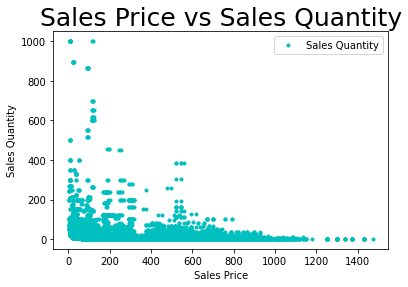

In [ ]:
df.plot(x='Sales Price',y='Sales Quantity',style='.',color='c')
plt.title('Sales Price vs Sales Quantity',fontdict={'family':'DejaVu Sans','size':25})
plt.xlabel('Sales Price')
plt.ylabel('Sales Quantity')
plt.show()

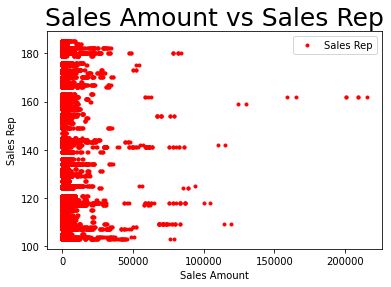

In [ ]:
df.plot(x='Sales Amount',y='Sales Rep',style='.',color='r')
plt.title('Sales Amount vs Sales Rep',fontdict={'family':'DejaVu Sans','size':25})
plt.xlabel('Sales Amount')
plt.ylabel('Sales Rep')
plt.show()

In [ ]:
df.drop('Item Class',axis=1,inplace=True)

In [ ]:
df['DateKey'].value_counts()

6/23/2017    436
7/5/2019     429
6/27/2017    286
1/11/2017    285
7/9/2019     281
            ... 
8/9/2019      21
7/3/2019       6
6/21/2017      6
6/7/2017       3
6/19/2019      3
Name: DateKey, Length: 558, dtype: int64

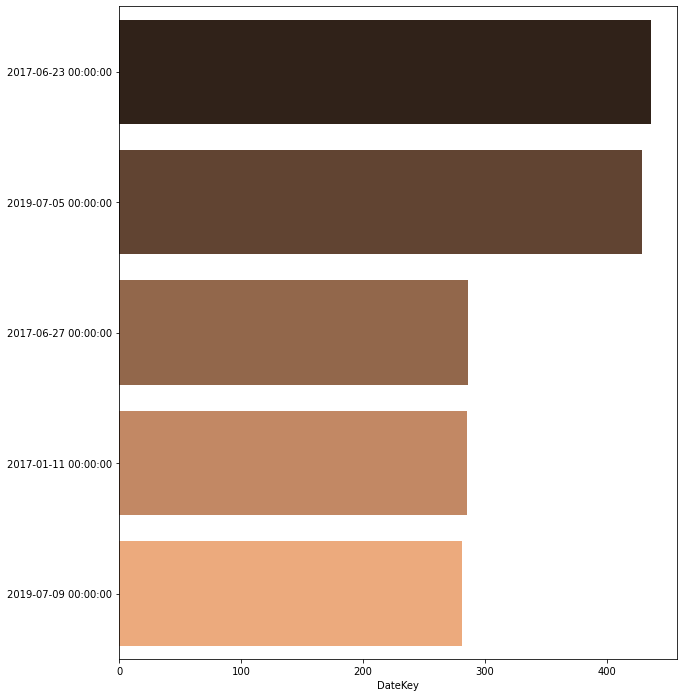

In [ ]:
df['DateKey'] = pd.to_datetime(df['DateKey'])
datekey=df['DateKey'].value_counts().head()
plt.figure(figsize=(10,12))
sb.barplot(x=datekey,y=datekey.index,palette='copper')
plt.show()

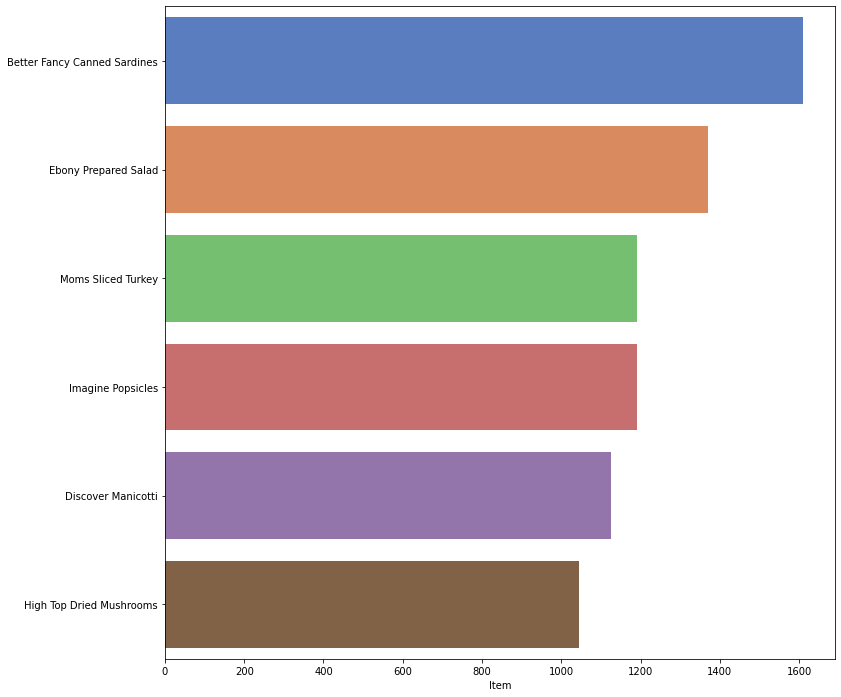

In [ ]:
item=df['Item'].value_counts().head(6)
plt.figure(figsize=(12,12))
sb.barplot(y=item.index,x=item,palette='muted')
sb.set_theme(style="whitegrid")
plt.show()

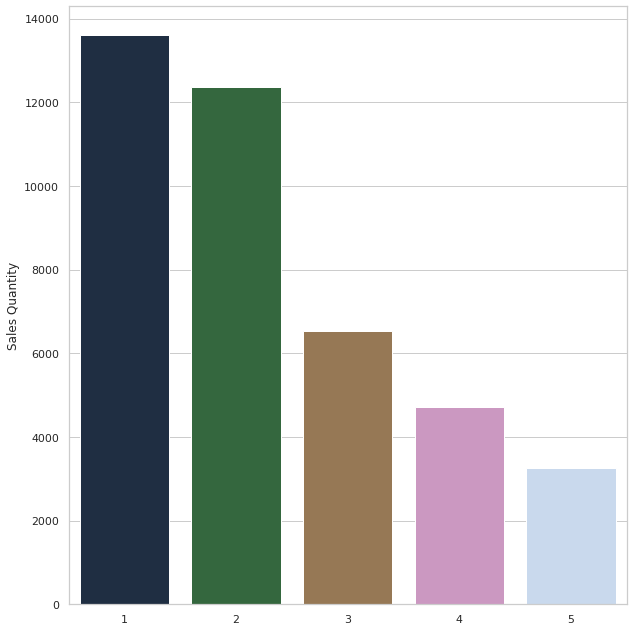

In [ ]:
sales=df['Sales Quantity'].value_counts().head()
plt.figure(figsize=(10,11))
sb.barplot(x=sales.index,y=sales,palette='cubehelix')
plt.show()

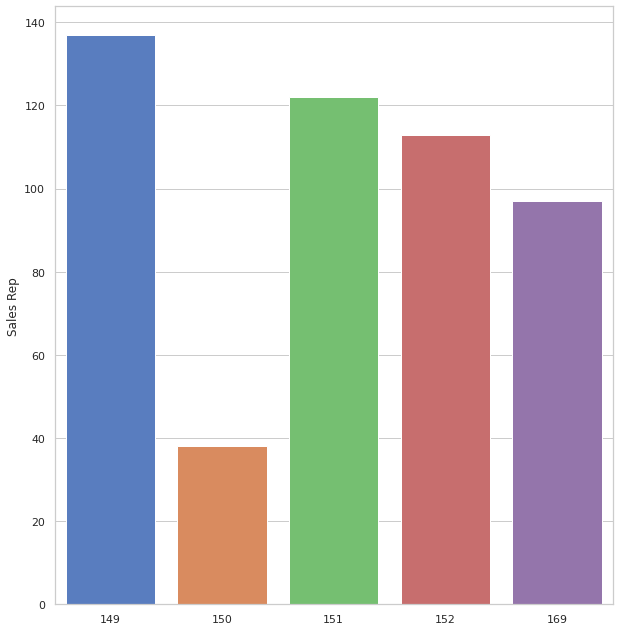

In [ ]:
salesr=df['Sales Rep'].value_counts().tail()
plt.figure(figsize=(10,11))
sb.barplot(x=salesr.index,y=salesr,palette='muted')
plt.show()

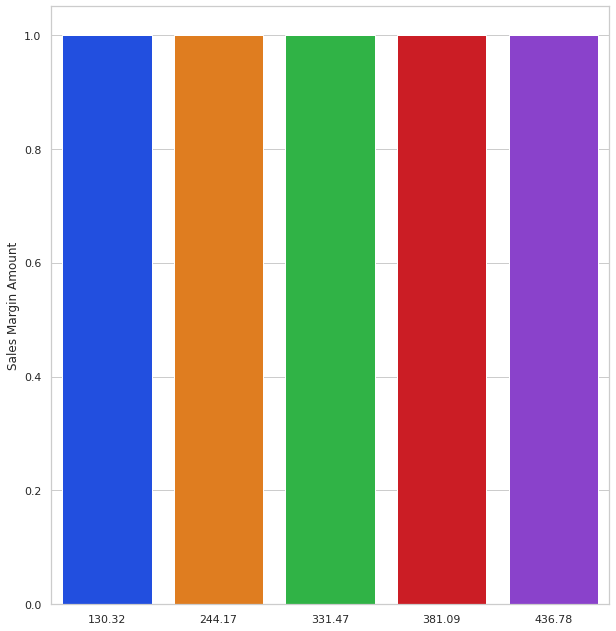

In [ ]:
salesm=df['Sales Margin Amount'].value_counts().tail()
plt.figure(figsize=(10,11))
sb.barplot(x=salesm.index,y=salesm,palette='bright')
plt.show()

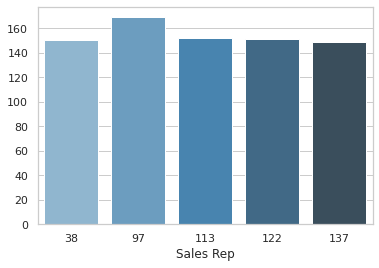

In [ ]:
salesr=df['Sales Rep'].value_counts().tail()
sb.barplot(x=salesr,y=salesr.index,data=df,palette="Blues_d")

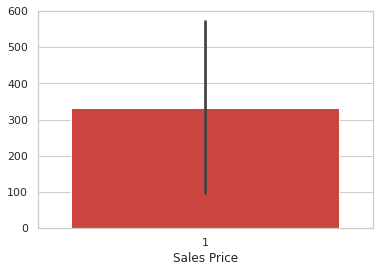

In [ ]:
salespr=df['Sales Price'].value_counts().tail()
sb.barplot(x=salespr,y=salespr.index,data=df,palette="Reds_d")

# Analyzing Amazon-Food-Sales-Trends

In [ ]:
df['DateKey'] = pd.to_datetime(df['DateKey'])

Sales_2017=int(df[(df['DateKey'] > '2017-01-01') & (df['DateKey'] <= '2018-01-01')]['Sales Amount'].sum())
Sales_2018=int(df[(df['DateKey'] > '2018-01-01') & (df['DateKey'] <= '2018-12-31')]['Sales Amount'].sum())
Sales_2019=int(df[(df['DateKey'] > '2019-01-01') & (df['DateKey'] <= '2019-12-31')]['Sales Amount'].sum())

print(Sales_2017,Sales_2018,Sales_2019)

44484000 10021315 39809585


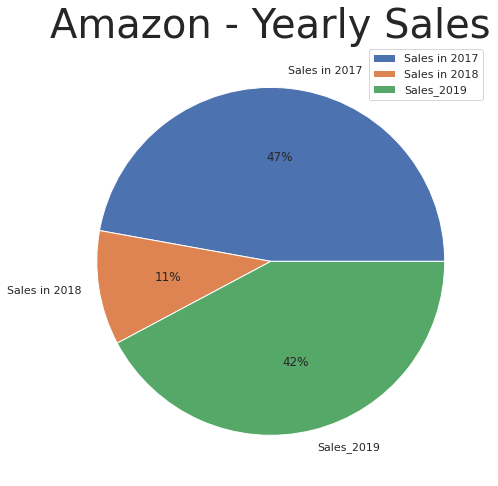

In [ ]:
year=['Sales in 2017','Sales in 2018','Sales_2019']
yearly_sales=[Sales_2017,Sales_2018,Sales_2019]
plt.figure(figsize=(10,8))
plt.pie(x=yearly_sales,labels=year,autopct='%.0f%%')
plt.title('Amazon - Yearly Sales',fontdict={'family':'DejaVu Sans','size':40})
plt.legend()
plt.show()

In [ ]:
df['DateKey'] = pd.to_datetime(df['DateKey'])


Sales_2017_Jan=int(df[(df['DateKey'] > '2018-01-01') & (df['DateKey'] <= '2018-02-01')]['Sales Amount'].sum())

Sales_2017_Feb=int(df[(df['DateKey'] > '2018-02-01') & (df['DateKey'] <= '2018-03-01')]['Sales Amount'].sum())

Sales_2017_Mar=int(df[(df['DateKey'] > '2017-03-01') & (df['DateKey'] <= '2017-04-01')]['Sales Amount'].sum())

Sales_2017_Apr=int(df[(df['DateKey'] > '2017-04-01') & (df['DateKey'] <= '2017-05-01')]['Sales Amount'].sum())

Sales_2017_May=int(df[(df['DateKey'] > '2017-05-01') & (df['DateKey'] <= '2017-06-01')]['Sales Amount'].sum())

Sales_2017_June=int(df[(df['DateKey'] > '2017-06-01') & (df['DateKey'] <= '2017-07-01')]['Sales Amount'].sum())

Sales_2017_July=int(df[(df['DateKey'] > '2017-07-01') & (df['DateKey'] <= '2017-08-01')]['Sales Amount'].sum())

Sales_2017_Aug=int(df[(df['DateKey'] > '2017-08-01') & (df['DateKey'] <= '2017-09-01')]['Sales Amount'].sum())

Sales_2017_Sept=int(df[(df['DateKey'] > '2017-09-01') & (df['DateKey'] <= '2017-10-01')]['Sales Amount'].sum())

Sales_2017_Oct=int(df[(df['DateKey'] > '2017-10-01') & (df['DateKey'] <= '2017-11-01')]['Sales Amount'].sum())

Sales_2017_Nov=int(df[(df['DateKey'] > '2017-11-01') & (df['DateKey'] <= '2017-12-01')]['Sales Amount'].sum())

Sales_2017_Dec=int(df[(df['DateKey'] > '2017-12-01') & (df['DateKey'] <= '2018-01-01')]['Sales Amount'].sum())

monthlysales=[Sales_2017_Jan,Sales_2017_Feb,Sales_2017_Mar,Sales_2017_Apr,Sales_2017_May,Sales_2017_June,Sales_2017_July,Sales_2017_Aug,Sales_2017_Sept,Sales_2017_Oct,Sales_2017_Nov,Sales_2017_Dec]
months=['January','Febraury','March','April','May','June','July','August','September','October','November','December']

No handles with labels found to put in legend.


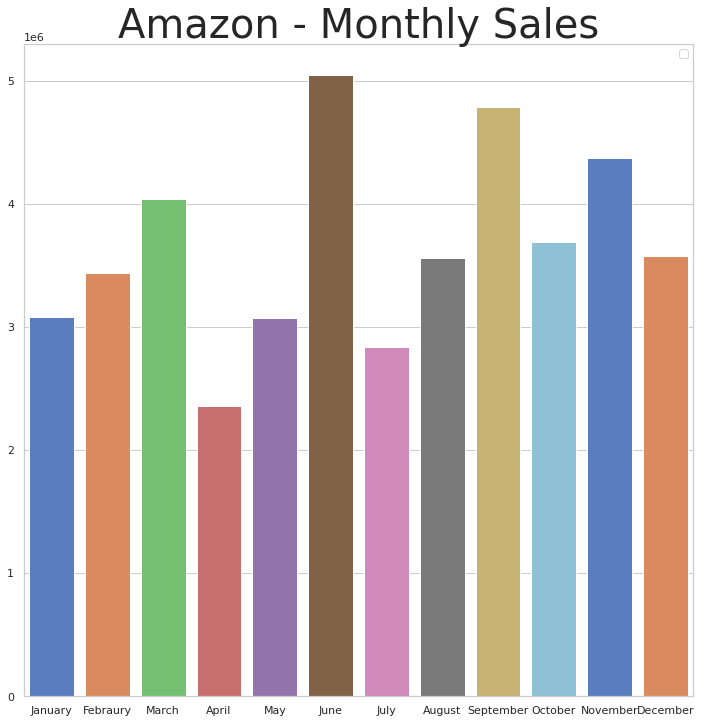

In [ ]:
plt.figure(figsize=(12,12))
sb.barplot(x=months,y=monthlysales,palette="muted")
plt.title('Amazon - Monthly Sales',fontdict={'family':'DejaVu Sans','size':40})
plt.legend()
plt.show()

**Importing,Reading,Data Cleaning - Manoj Darshan**

**Exploratory Data Analysis - Raksha Srinivasan**

**Analyzing Amazon Sales Trends - Sneha Priya R N**